# Desafio: Regressão Logística - Modelos de Classificação

###Squad Jill Tarter



---



## Carregando os pacotes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Leitura dos dados

Clicar no link e baixar o arquivo na sua máquina

https://drive.google.com/file/d/1sGcvR75fYGQrIUmvJ0JwnHk-zbYZPRN3/view?usp=drive_link

In [ ]:
#Após rodar o código, clique em "Escolher arquivos" para importar o arquivo que você baixou
from google.colab import files
uploaded = files.upload()

Saving Heart_disease_statlog.csv to Heart_disease_statlog (1).csv


In [ ]:
df_heart_disease = pd.read_csv('Heart_disease_statlog.csv')
df_heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [ ]:
df_heart_disease.shape

(270, 14)

In [ ]:
df_heart_disease.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
df_heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [ ]:
colunas_renomeadas = {
    'age': 'idade',
    'sex': 'gênero',
    'cp': 'tipo_dor_torácica',
    'trestbps': 'pressão_arterial_em_repouso',
    'chol': 'colesterol_sérico',
    'fbs': 'açúcar_em_jejum',
    'restecg': 'eletrocardiograma_em_repouso',
    'thalach': 'frequência_cardíaca_máxima',
    'exang': 'angina_de_exercício',
    'oldpeak': 'pico_velho',
    'slope': 'inclinação_st',
    'ca': 'vasos_principais',
    'thal': 'talassemia',
    'target': 'target'
}

In [ ]:
df_heart_disease.rename(columns = colunas_renomeadas, inplace = True)
df_heart_disease.head()

,idade,gênero,tipo_dor_torácica,pressão_arterial_em_repouso,colesterol_sérico,açúcar_em_jejum,eletrocardiograma_em_repouso,frequência_cardíaca_máxima,angina_de_exercício,pico_velho,inclinação_st,vasos_principais,talassemia,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [ ]:
df_heart_disease.describe()

,idade,gênero,tipo_dor_torácica,pressão_arterial_em_repouso,colesterol_sérico,açúcar_em_jejum,eletrocardiograma_em_repouso,frequência_cardíaca_máxima,angina_de_exercício,pico_velho,inclinação_st,vasos_principais,talassemia,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000




---



## **Intruções do desafio**

### **Classificação de Doenças Cardíacas**
**Contexto:**

O conjunto de dados é o conjunto de dados Statlog Heart Disease obtido do repositório UCI. O conjunto de dados consiste em dados de 270 indivíduos. Existem 14 colunas no conjunto de dados (que foram extraídas de um conjunto maior de 75). Sem valores ausentes. A tarefa de classificação é prever se um indivíduo sofre de doença cardíaca ou não. (0: ausência, 1:
presença).

Este é um estudo importante porque a saúde é um ponto vital de pesquisa para melhor ajudar os pacientes com certas condições. Além disso, a pressão arterial geralmente não apresenta sintomas e, no entanto, se a pressão alta não for tratada, pode ser um grande contribuinte para condições de saúde mais graves, como um derrame ou ataque cardíaco [2].



---



###**Dicionário de dados**

Este banco de dados contém 13 atributos e uma variável de destino. Possui 8 valores nominais e 5 valores numéricos. A descrição detalhada de todos esses recursos é a seguinte:


*   **Age:** idade dos pacientes em anos.
*   **Sex:**
> Masculino: 1;
> Feminino: 0.
*   **cp:** Tipo de dor torácica sentida pelo paciente. Este termo é categorizado em 4 categorias:
> 0 angina típica;
> 1 angina atípica;
> 2 dor não anginosa;
> 3 assintomática.
*   **Itrestbps:** nível de pressão arterial do paciente no modo de repouso em mm/HG.
*   **chol:** colesterol sérico em mg/dl.
*   **fbs:** Níveis de açúcar no sangue em jejum > 120 mg/dl representa (Nominal):
> 1 em caso de verdadeiro;
> 0 como falso.
*   **restecg:** O resultado do eletrocardiograma em repouso é representado em 3 valores distintos:
> Normal;
> 1: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV);
> 2: mostrando provável ou definitiva hipertrofia ventricular esquerda por Critérios de Estes.
*   **thalach:** frequência cardíaca máxima alcançada
*   **exang:** Angina induzida pelo exercício
> 0 retratando Não;
> 1 retratando Sim;
*   **oldpeak:** Depressão do ST induzida pelo exercício em relação ao estado de repouso.
*   **slope:** segmento ST medido em termos de inclinação durante o pico do exercício:
> 0: inclinação ascendente;
> 1: plano;
> 2: inclinação descendente.
*   **ca:** O número de vasos principais (0–3) (nominal)
*   **thal:** Um distúrbio sanguíneo chamado talassemia:
> 0: NULO;
> 1: fluxo sanguíneo normal;
> 2: defeito fixo (sem fluxo sanguíneo em alguma parte do coração);
> 3: defeito reversível (um fluxo sanguíneo é observado, mas não é normal (nominal).
*   **target:** É a variável alvo que temos que prever:
> 1 significa que o paciente sofre de doença cardíaca;
> 0 significa que o paciente é normal.





---



# **Exercício 1**

##1- Entenda faça uma análise exploratória dos dados observando as principais variáveis e a sua relação com a target

In [ ]:
# estatística descritiva, gráficos de contagem, % da base que a target tem 1 e 0, agregar pela terget 0 e 1 as diferentes variáveis

In [ ]:
## calcula a matriz de correlação
corr = df_heart_disease.corr()

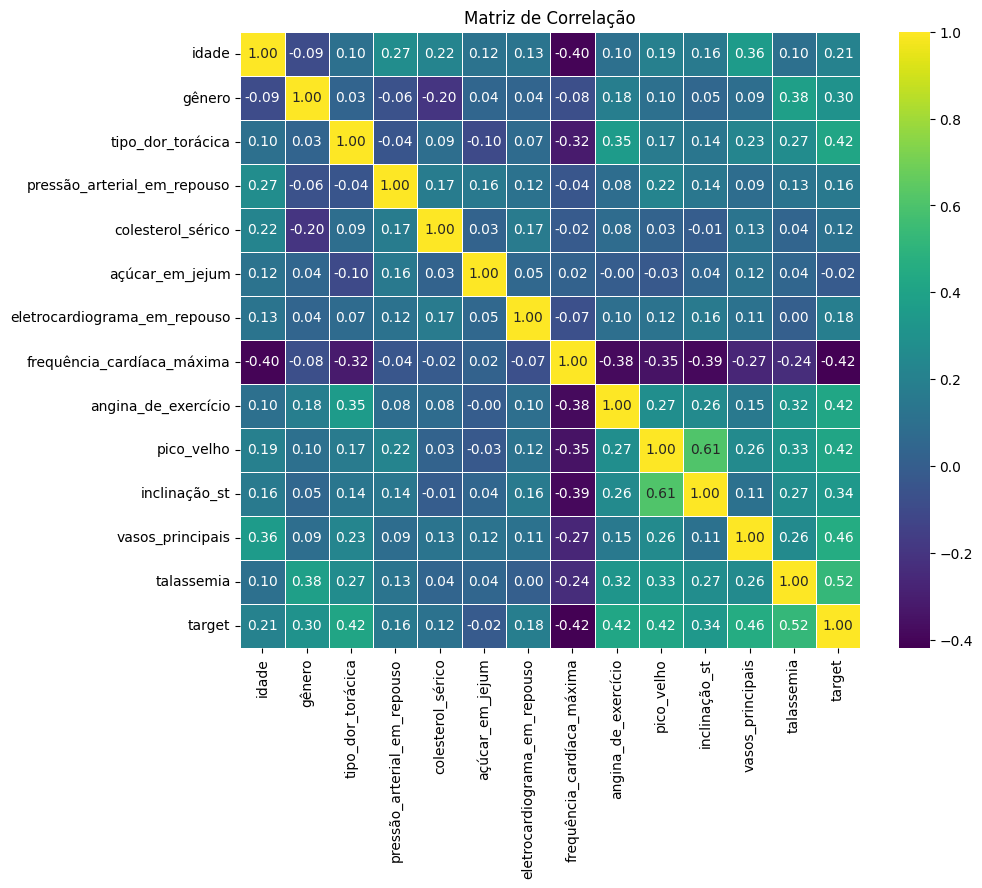

In [ ]:
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

###Vemos uma correlação mais forte entre a variável target & talassemia e inclinação_st & pico_velho.

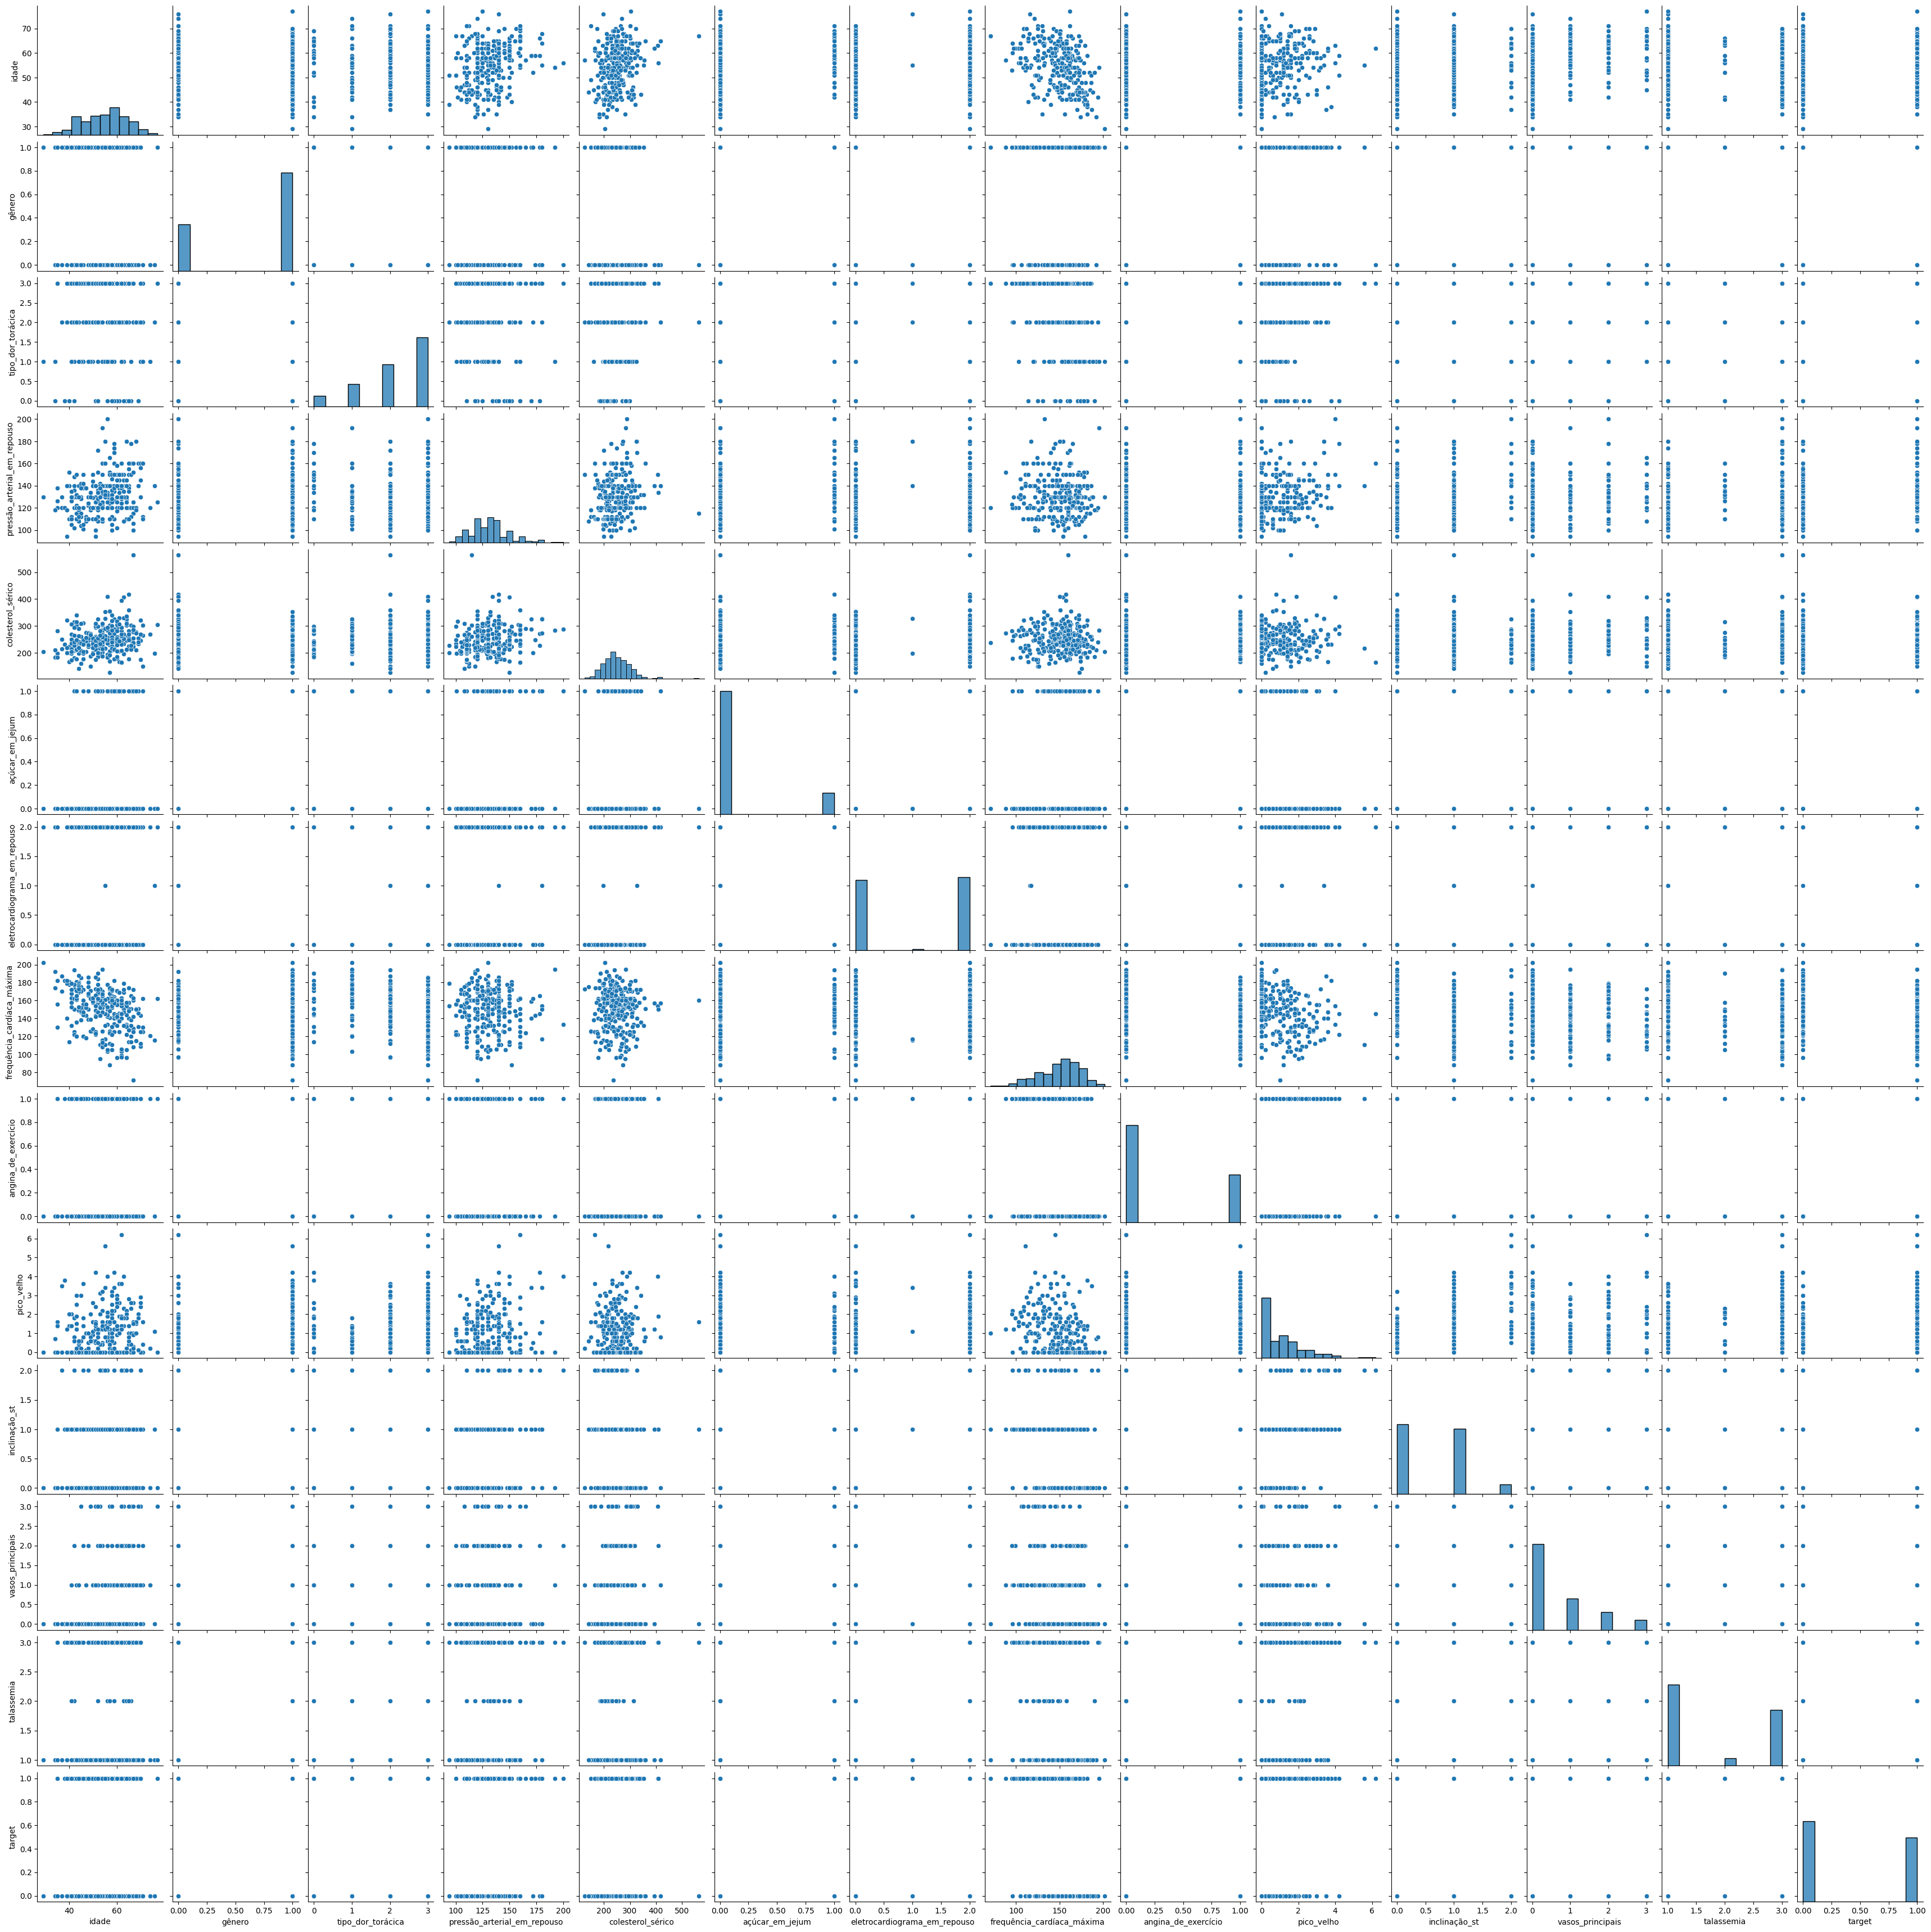

In [ ]:
sns.pairplot(df_heart_disease, diag_kind='hist')

Text(0.5, 1.0, 'Contagem de Pacientes')

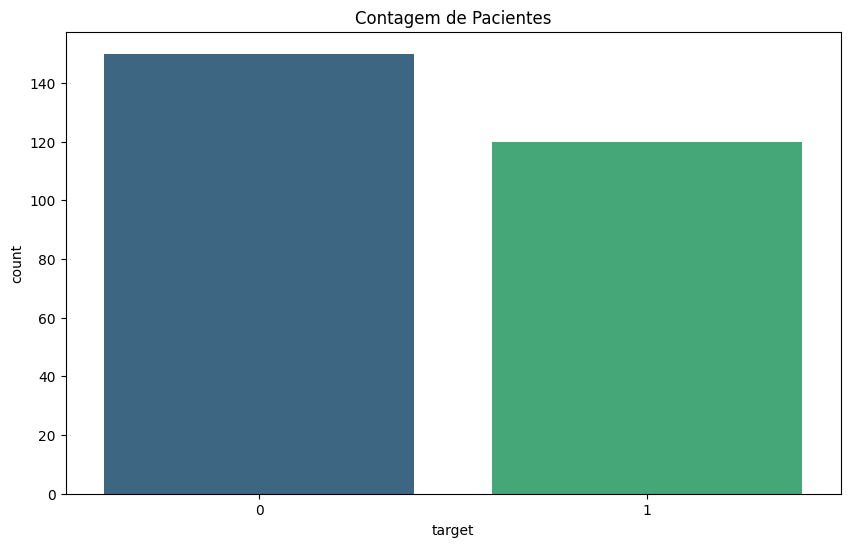

In [ ]:
palette = sns.color_palette("viridis", len(df_heart_disease['target'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(df_heart_disease, x="target",palette=palette).set_title('Contagem de Pacientes')

In [ ]:
df_heart_disease.target.value_counts(normalize = True)

,proportion
target,
0,0.555556
1,0.444444


In [ ]:
df_heart_disease[['idade', 'gênero', 'tipo_dor_torácica', 'pressão_arterial_em_repouso', 'colesterol_sérico', 'açúcar_em_jejum', 'eletrocardiograma_em_repouso', 'frequência_cardíaca_máxima',
       'angina_de_exercício', 'pico_velho', 'inclinação_st', 'vasos_principais', 'talassemia', 'target']].groupby('target').agg({
                                  'idade':np.median,
                                  'gênero': np.median,
                                  'tipo_dor_torácica': np.median,
                                  'pressão_arterial_em_repouso': np.median,
                                  'colesterol_sérico': np.median,
                                  'açúcar_em_jejum': np.median,
                                  'eletrocardiograma_em_repouso': np.median,
                                  'frequência_cardíaca_máxima': np.median,
                                  'angina_de_exercício': np.median,
                                  'pico_velho': np.median,
                                  'inclinação_st': np.median,
                                  'vasos_principais': np.median,
                                  'talassemia': np.median
                              })

,idade,gênero,tipo_dor_torácica,pressão_arterial_em_repouso,colesterol_sérico,açúcar_em_jejum,eletrocardiograma_em_repouso,frequência_cardíaca_máxima,angina_de_exercício,pico_velho,inclinação_st,vasos_principais,talassemia
target,,,,,,,,,,,,,
0,52.0,1.0,2.0,130.0,236.0,0.0,0.0,161.0,0.0,0.2,0.0,0.0,1.0
1,58.0,1.0,3.0,130.0,255.5,0.0,2.0,141.5,1.0,1.4,1.0,1.0,3.0


In [ ]:
variaveis_categoricas = ['gênero', 'tipo_dor_torácica', 'açúcar_em_jejum', 'eletrocardiograma_em_repouso', 'angina_de_exercício', 'vasos_principais', 'talassemia']

variaveis_numericas = ['idade', 'pressão_arterial_em_repouso', 'colesterol_sérico', 'frequência_cardíaca_máxima', 'pico_velho']

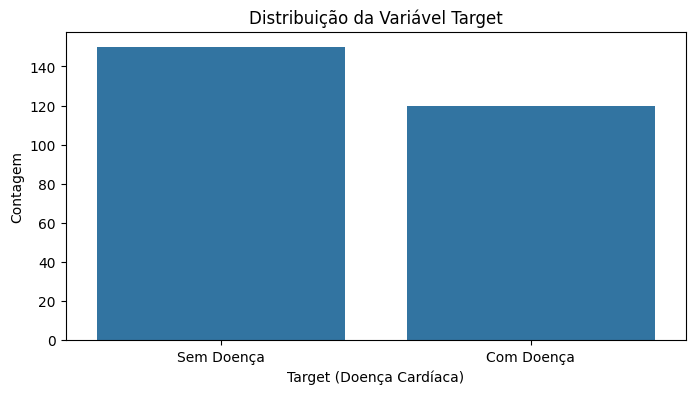

In [ ]:
# Distribuição da variável target
plt.figure(figsize=(8, 4))
sns.countplot(data=df_heart_disease, x='target')
plt.title('Distribuição da Variável Target')
plt.xlabel('Target (Doença Cardíaca)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Sem Doença', 'Com Doença'])
plt.show()

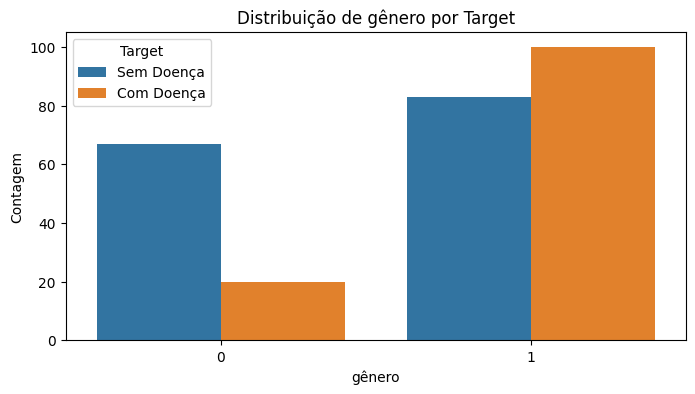

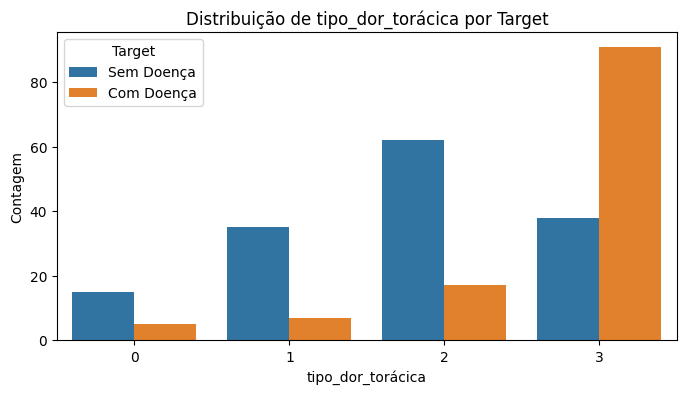

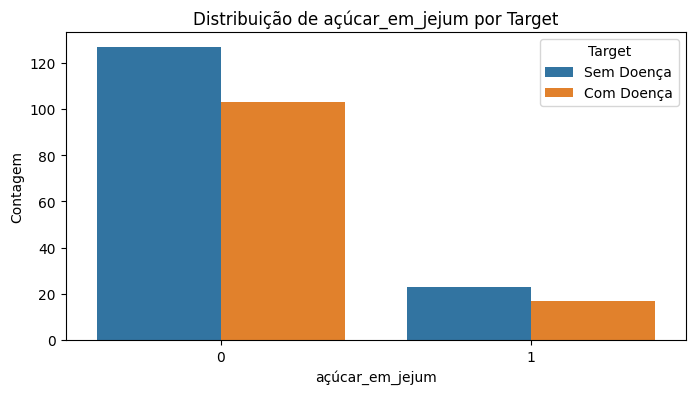

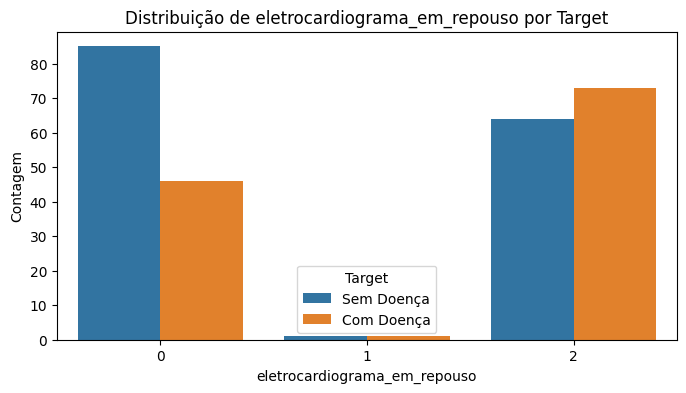

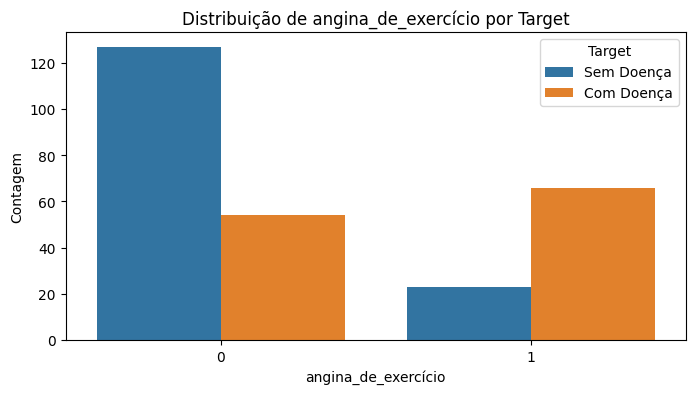

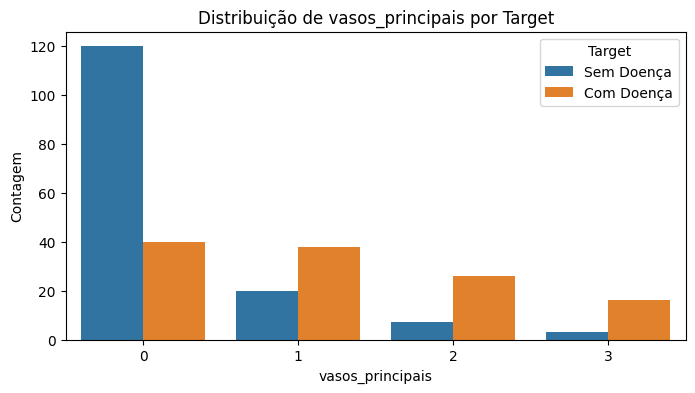

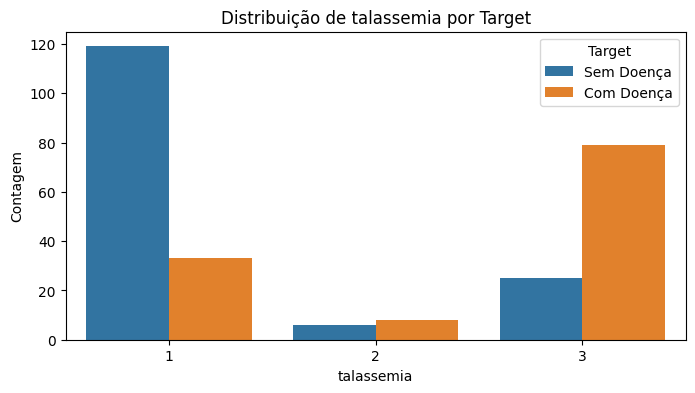

In [ ]:
for variavel in variaveis_categoricas:
  plt.figure(figsize=(8, 4))
  sns.countplot(data=df_heart_disease, x=df_heart_disease[variavel], hue='target')
  plt.title(f'Distribuição de {variavel} por Target')
  plt.xlabel(variavel)
  plt.ylabel('Contagem')
  plt.legend(title='Target', labels=['Sem Doença', 'Com Doença'])
  plt.show()


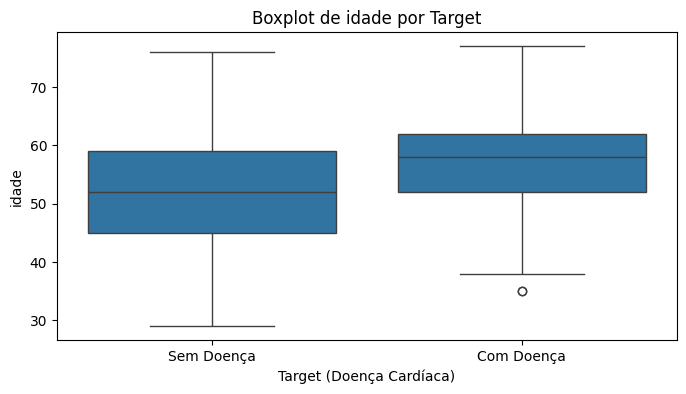

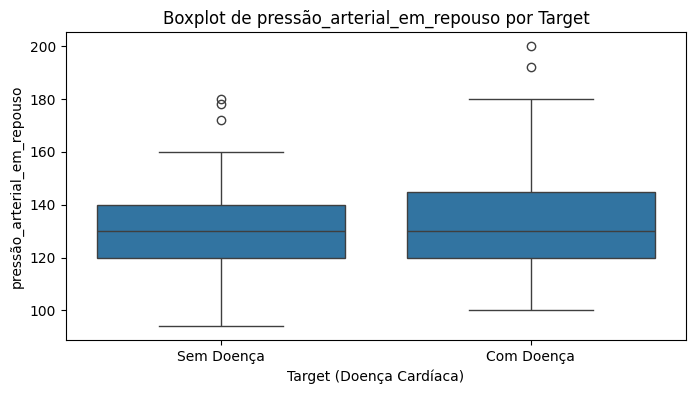

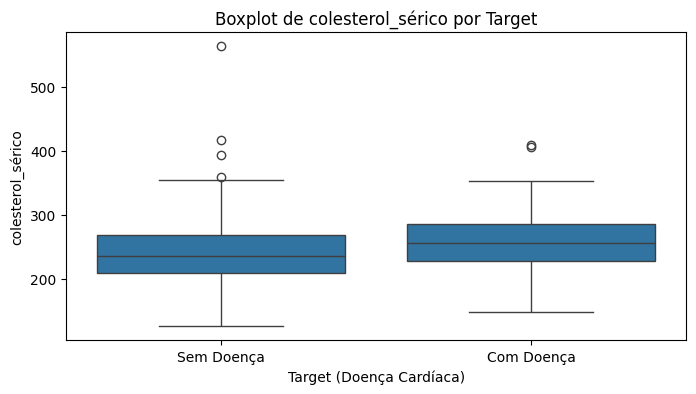

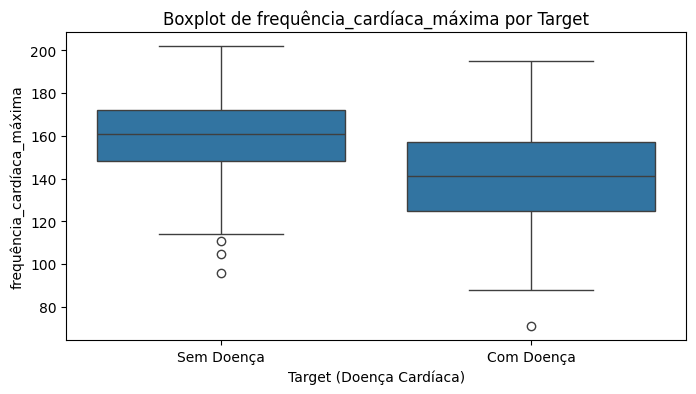

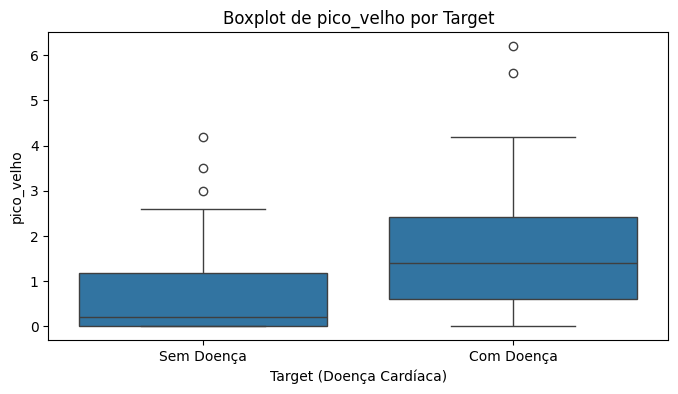

In [ ]:
for variavel in variaveis_numericas:
  plt.figure(figsize=(8, 4))
  sns.boxplot(data=df_heart_disease, x='target', y=df_heart_disease[variavel])
  plt.title(f'Boxplot de {variavel} por Target')
  plt.xlabel('Target (Doença Cardíaca)')
  plt.ylabel(variavel)
  plt.xticks([0, 1], ['Sem Doença', 'Com Doença'])
  plt.show()

## Podemos ver que os indivíduos que sofrem de doença cardíaca estão relacionados:

*   ao distúrbio sanguíneo talassemia (thal) classificado como 3 (3: defeito reversível - um fluxo sanguíneo é observado, mas não é normal (nominal)).
*   a variável restecg representada por 2 (resultado do eletrocardiograma em repouso 2: mostrando provável ou definitiva hipertrofia ventricular esquerda por Critérios de Estes).
*  a variável exang (Angina induzida pelo exercício) com valor 1 (retratando).
*  a dor torácica sentida (cp): 3 assintomática.
*  ao colesterol sérico em mg/dl maior (chol)
*  a variável thalach, frequência cardíaca máxima alcançada mais baixa.
*  slope plano 1 - segmento ST medido em termos de inclinação durante o pico do exercício.
*  ao ca, número de vasos principais, igual a 1.



Variáveis que não diferenciam a classificação dos indivíduos com doença cardíaca: sex (masculino ou feminino), trestbps (nível de pressão arterial do paciente no modo de repouso) e fbs (níveis de açúcar no sangue em jejum).



---



---



---



#**Exercício 2**

##2 - Construa um modelo de regressão logística para classificar se o indivíduo sofre doença cardíaca ou não.

In [ ]:
 #1 Features para o modelo
features = ['idade', 'gênero', 'tipo_dor_torácica', 'pressão_arterial_em_repouso', 'colesterol_sérico', 'açúcar_em_jejum', 'eletrocardiograma_em_repouso', 'frequência_cardíaca_máxima', 'angina_de_exercício', 'pico_velho', 'inclinação_st', 'vasos_principais', 'talassemia']
target = 'target'

 #2 Separando os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(df_heart_disease[features],
df_heart_disease[target], test_size=0.2, random_state=42)

 #3 Escalonando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 #4 Criando e treinando o modelo
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

 #5 Fazendo previsões
y_pred = model.predict(X_test)

 #6 Avaliando o modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54

[[32  1]
 [ 3 18]]
0.9259259259259259


###Este valor representa a acurácia geral do modelo, que é de aproximadamente 92.6%.

Interpretação:

O modelo de Regressão Logística apresentou um bom desempenho na classificação de pacientes com e sem doença cardíaca, com uma acurácia de 92.6%. As métricas de precisão, recall e F1-score também indicam um bom desempenho para ambas as classes. A matriz de confusão mostra que o modelo teve poucos erros de classificação. Em geral, o modelo parece ser eficaz para a tarefa de classificação de doenças cardíacas.



---



---



---



## **Exercício 3**

3 - Analise o resultado da regressão logística e plote a matriz de confusão.

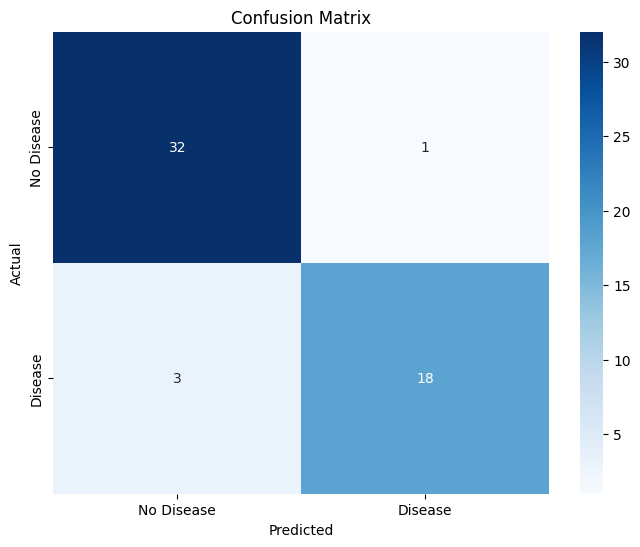

In [ ]:
#assume y_test e y_pred já foram definidas no código anterior
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
df_heart_disease.columns

Index(['idade', 'gênero', 'tipo_dor_torácica', 'pressão_arterial_em_repouso',
       'colesterol_sérico', 'açúcar_em_jejum', 'eletrocardiograma_em_repouso',
       'frequência_cardíaca_máxima', 'angina_de_exercício', 'pico_velho',
       'inclinação_st', 'vasos_principais', 'talassemia', 'target'],
      dtype='object')